# Einstein Biography Knowledge Graph

This notebook demonstrates the creation of a knowledge graph using spaCy and NetworkX. The graph visualizes key entities and relationships from a short biography of Albert Einstein

### Importing necessary libraries.

In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Loading and processing text with spaCy

In [6]:
! python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Text to analyze
text = "Born in the German Empire, Einstein moved to Switzerland in 1895, and at the age of seventeen he enrolled in the mathematics and physics teaching diploma program at the Swiss federal polytechnic school. In 1903, he secured a permanent position at the Swiss Patent Office."

# Process the text with spaCy
doc = nlp(text)

### Creating and populating a NetworkX graph with entities and relationships

In [8]:
# Create a networkx graph
G = nx.DiGraph()

# Add the main entity (Einstein) to the graph
G.add_node("Einstein", type="Person")

# Extract and add entities and relationships
for ent in doc.ents:
    # Add entity nodes
    G.add_node(ent.text, type=ent.label_)
    
    # Add edges between Einstein and other entities
    if ent.label_ in ["GPE", "ORG"]:
        G.add_edge("Einstein", ent.text, relation="associated_with")

# Add some specific relationships based on the text
G.add_edge("Einstein", "German Empire", relation="born_in")
G.add_edge("Einstein", "Switzerland", relation="moved_to")
G.add_edge("Einstein", "Swiss federal polytechnic school", relation="enrolled_in")
G.add_edge("Einstein", "Swiss Patent Office", relation="worked_at")

### Visualizing the graph using Matplotlib

/var/folders/6d/2tlf7h6j50l94c4dmfx8xfgw0000gn/T/ipykernel_21605/1163458219.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


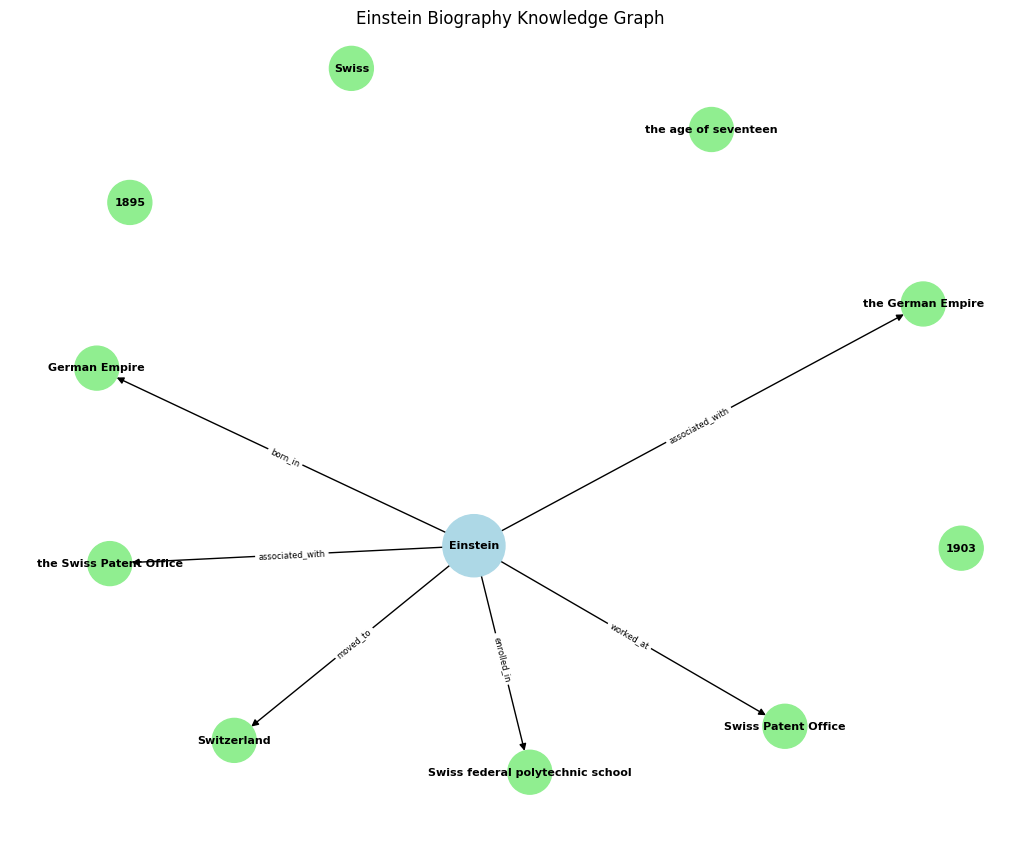

Nodes: [('Einstein', {'type': 'PERSON'}), ('the German Empire', {'type': 'GPE'}), ('Switzerland', {'type': 'GPE'}), ('1895', {'type': 'DATE'}), ('the age of seventeen', {'type': 'DATE'}), ('Swiss', {'type': 'NORP'}), ('1903', {'type': 'DATE'}), ('the Swiss Patent Office', {'type': 'ORG'}), ('German Empire', {}), ('Swiss federal polytechnic school', {}), ('Swiss Patent Office', {})]

Edges: [('Einstein', 'the German Empire', {'relation': 'associated_with'}), ('Einstein', 'Switzerland', {'relation': 'moved_to'}), ('Einstein', 'the Swiss Patent Office', {'relation': 'associated_with'}), ('Einstein', 'German Empire', {'relation': 'born_in'}), ('Einstein', 'Swiss federal polytechnic school', {'relation': 'enrolled_in'}), ('Einstein', 'Swiss Patent Office', {'relation': 'worked_at'})]


In [9]:
# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = ['lightblue' if node == "Einstein" else 'lightgreen' for node in G.nodes()]
node_sizes = [2000 if node == "Einstein" else 1000 for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, 
        node_size=node_sizes, font_size=8, 
        font_weight="bold", arrows=True)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Einstein Biography Knowledge Graph")
plt.tight_layout()
plt.show()

# Print out the graph details
print("Nodes:", list(G.nodes(data=True)))
print("\nEdges:", list(G.edges(data=True)))